 <p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Bakery Sales Prediction based on Weather</p> <br>
<p style="font-family: Arial; font-size:1.5em;color:purple; font-style:bold">
Given: </p>
<ul>
<li><p style="font-family: Arial; font-size:1em;color:black; font-style:bold">
Sales record of four different items in period from 2013 to 2019</p>
<li><p style="font-family: Arial; font-size:1em;color:black; font-style:bold">
Weather data from 2013 to 2019
</p> 
</ul>
<p style="font-family: Arial; font-size:1.5em;color:purple; font-style:bold">
Task: 
<ul>
    <li><p style="font-family: Arial; font-size:1em;color:black; font-style:bold">
      Predict the sales for a given day, depending on the weather conditions.  
</ul>
</p>
<br>

In [1]:
%cd D:\CAU Kiel\Deep Learning with TensorFlow\Data Sales Prediction Project\Jupyter Notebook\Data

D:\CAU Kiel\Deep Learning with TensorFlow\Data Sales Prediction Project\Jupyter Notebook\Data


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Importing required libraries</p>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
print(tf.__version__)

2.0.0


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Loading the data into Pandas Dataframes</p>

In [4]:
df = pd.read_csv('umsatzdaten_gekuerzt.csv')
kiwo = pd.read_csv('kiwo.csv')
weather = pd.read_csv('wetter.csv')

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Total entries </p>

In [5]:
len(df)

10869

In [6]:
df.head()

,Datum,Warengruppe,Umsatz
0,2013-07-01,1,148.828353
1,2013-07-02,1,159.793757
2,2013-07-03,1,111.885594
3,2013-07-04,1,168.864941
4,2013-07-05,1,171.280754


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Splitting the data into 4 groups, for four individual items</p>

In [7]:
Group_1 = df[df['Warengruppe'] == 1]
Group_2 = df[df['Warengruppe'] == 2]
Group_3 = df[df['Warengruppe'] == 3]
Group_4 = df[df['Warengruppe'] == 4]

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Merging data with weather data, based on the data</p>

In [8]:
Group_1_merged = Group_1.merge(weather[['Datum','Bewoelkung','Temperatur','Windgeschwindigkeit']])
Group_2_merged = Group_2.merge(weather[['Datum','Bewoelkung','Temperatur','Windgeschwindigkeit']])
Group_3_merged = Group_3.merge(weather[['Datum','Bewoelkung','Temperatur','Windgeschwindigkeit']])
Group_4_merged = Group_4.merge(weather[['Datum','Bewoelkung','Temperatur','Windgeschwindigkeit']])

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Dropping rows with missing values</p>

In [9]:
G1 = Group_1_merged.dropna()
G2 = Group_2_merged.dropna()
G3 = Group_3_merged.dropna()
G4 = Group_4_merged.dropna()


In [10]:
G1 = G1.drop('Warengruppe',axis = 1)
G2 = G2.drop('Warengruppe',axis = 1)
G3 = G3.drop('Warengruppe',axis = 1)
G4 = G4.drop('Warengruppe',axis = 1)

In [11]:
G1.head()

,Datum,Umsatz,Bewoelkung,Temperatur,Windgeschwindigkeit
0,2013-07-01,148.828353,6.0,17.8375,15
1,2013-07-02,159.793757,3.0,17.3125,10
2,2013-07-03,111.885594,7.0,21.0750,6
3,2013-07-04,168.864941,7.0,18.8500,7
4,2013-07-05,171.280754,5.0,19.9750,12


In [12]:
G1['Datum'] = pd.to_datetime(G1['Datum'])
G2['Datum'] = pd.to_datetime(G2['Datum'])
G3['Datum'] = pd.to_datetime(G3['Datum'])
G4['Datum'] = pd.to_datetime(G4['Datum'])

In [13]:
G2.head()

,Datum,Umsatz,Bewoelkung,Temperatur,Windgeschwindigkeit
0,2013-07-01,535.856285,6.0,17.8375,15
1,2013-07-02,546.780787,3.0,17.3125,10
2,2013-07-03,427.343259,7.0,21.0750,6
3,2013-07-04,454.859641,7.0,18.8500,7
4,2013-07-05,492.818804,5.0,19.9750,12


In [14]:
type(G1['Datum'].loc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [15]:
Time_Period_G1 = 'From ' + str(min(G1['Datum'])) + ' to ' + str(max(G1['Datum']))
Time_Period_G2 = 'From ' + str(min(G2['Datum'])) + ' to ' + str(max(G2['Datum']))
Time_Period_G3 = 'From ' + str(min(G3['Datum'])) + ' to ' + str(max(G3['Datum']))
Time_Period_G4 = 'From ' + str(min(G4['Datum'])) + ' to ' + str(max(G4['Datum']))

In [16]:
Time_Period_G1

'From 2013-07-01 00:00:00 to 2019-05-31 00:00:00'

In [17]:
Time_Period_G1 == Time_Period_G2 == Time_Period_G3 == Time_Period_G4

True

In [18]:
len(G1) == len(G2) == len(G3) 

True

In [19]:
len(G1)

2090

In [20]:
len(G4)

2036

In [60]:
def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
       plt.legend(fontsize=14)
    plt.grid(True)

In [28]:
training_start_date = '07-01-2013'
training_end_date = '06-30-2018'
training_period_G1 = (G1['Datum'] >= training_start_date) & (G1['Datum'] <= training_end_date)
training_dataset_G1 = G1[training_period_G1].drop('Datum', axis = 1)

In [37]:
testing_start_date = '07-01-2018'
testing_end_date = '05-31-2019'
testing_period = (G1['Datum'] >= testing_start_date) & (G1['Datum'] <= testing_end_date)
testing_dataset_G1 = G1[testing_period].drop('Datum', axis = 1)

In [64]:
one_year_G1 = (G1['Datum'] >= '01-01-2014') & (G1['Datum'] <= '12-31-2014')
one_year_G1 = G1[one_year_G1]
one_year_G2 = (G2['Datum'] >= '01-01-2014') & (G2['Datum'] <= '12-31-2014')
one_year_G2 = G2[one_year_G2]
one_year_G3 = (G3['Datum'] >= '01-01-2014') & (G3['Datum'] <= '12-31-2014')
one_year_G3 = G3[one_year_G3]
one_year_G4 = (G4['Datum'] >= '01-01-2014') & (G4['Datum'] <= '12-31-2014')
one_year_G4 = G4[one_year_G4]

In [63]:
len(one_year_G1)

357

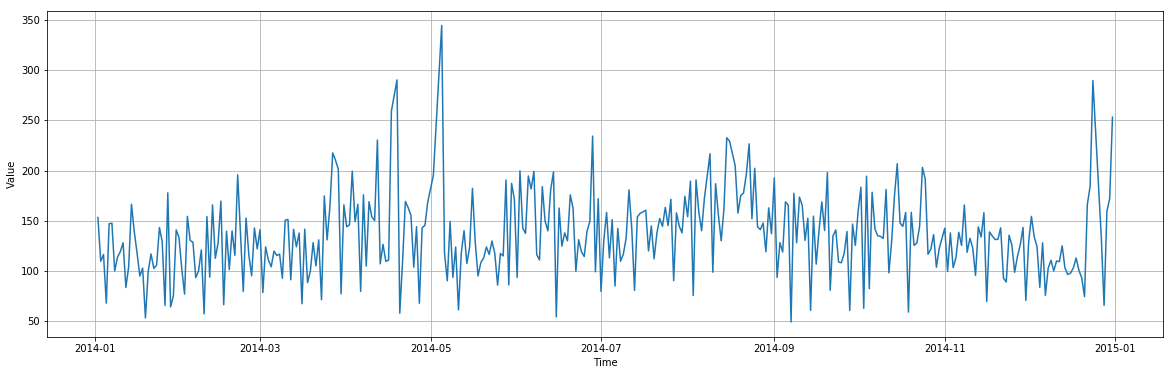

In [62]:
plt.figure(figsize=(20, 6))
plot_series(one_year_G1['Datum'], one_year_G1['Umsatz'])
plt.show()

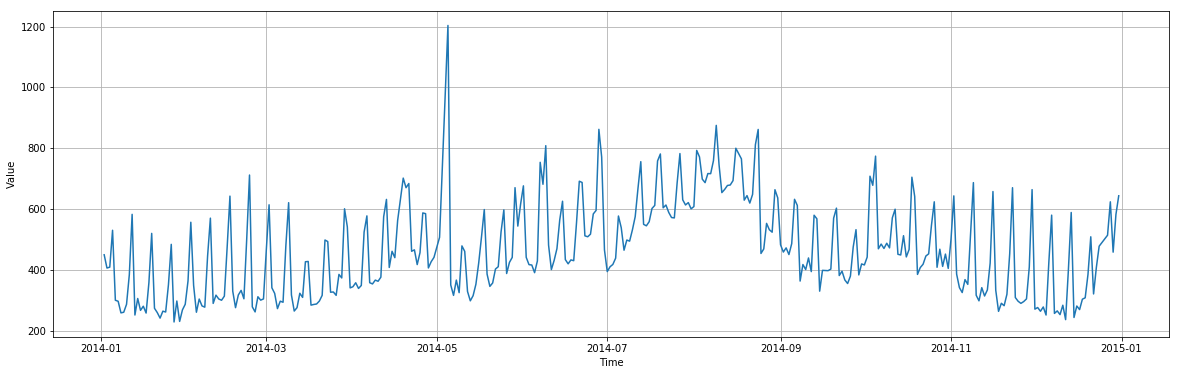

In [65]:
plt.figure(figsize=(20, 6))
plot_series(one_year_G2['Datum'], one_year_G2['Umsatz'])
plt.show()

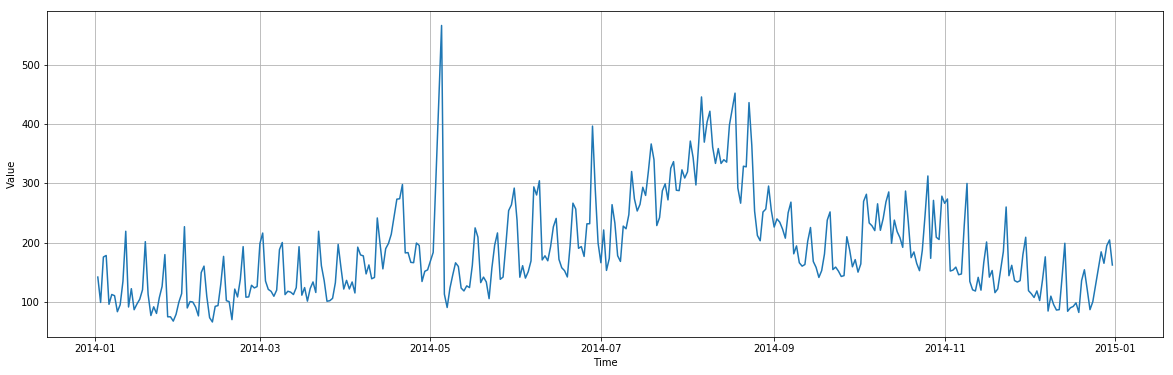

In [66]:
plt.figure(figsize=(20, 6))
plot_series(one_year_G3['Datum'], one_year_G3['Umsatz'])
plt.show()

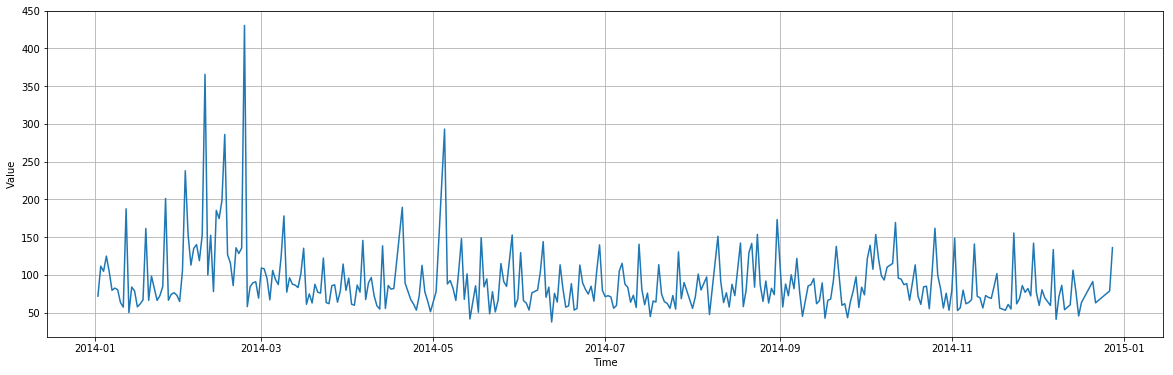

In [67]:
plt.figure(figsize=(20, 6))
plot_series(one_year_G4['Datum'], one_year_G4['Umsatz'])
plt.show()

In [38]:
training_dataset_G1.head()

,Umsatz,Bewoelkung,Temperatur,Windgeschwindigkeit
0,148.828353,6.0,17.8375,15
1,159.793757,3.0,17.3125,10
2,111.885594,7.0,21.0750,6
3,168.864941,7.0,18.8500,7
4,171.280754,5.0,19.9750,12


In [39]:
testing_dataset_G1.head()

,Umsatz,Bewoelkung,Temperatur,Windgeschwindigkeit
1785,106.398296,0.0,21.0625,12
1786,149.330713,0.0,22.5250,11
1787,169.678254,0.0,22.4875,9
1788,109.364720,5.0,19.7000,9
1789,116.912048,7.0,17.5000,12


In [23]:
#train_dataset_G1 = G1_train.sample(frac=0.8,random_state=0)
#test_dataset_G1 = G1_train.drop(train_dataset_G1.index)

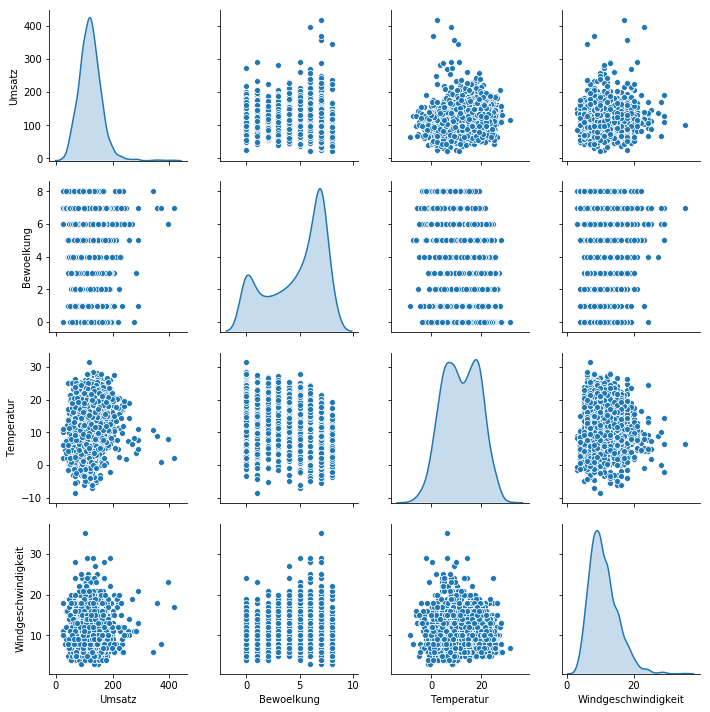

In [40]:
sns.pairplot(training_dataset_G1[["Umsatz", "Bewoelkung", "Temperatur", "Windgeschwindigkeit"]], diag_kind="kde")


In [41]:
train_stats_G1 = training_dataset_G1.describe()
train_stats_G1.pop("Umsatz")
train_stats_G1 = train_stats_G1.transpose()
train_stats_G1

,count,mean,std,min,25%,50%,75%,max
Bewoelkung,1776.0,4.735923,2.628677,0.000,3.00,6.000,7.000000,8.0000
Temperatur,1776.0,12.021284,7.161698,-8.475,6.25,11.875,17.890625,31.4375
Windgeschwindigkeit,1776.0,10.994369,4.147692,3.000,8.00,10.000,13.000000,35.0000


In [42]:
train_labels_G1 = training_dataset_G1.pop('Umsatz')
test_labels_G1  = testing_dataset_G1.pop('Umsatz')

In [43]:
def norm(x):
  return (x - train_stats_G1['mean']) / train_stats_G1['std']


In [44]:
normed_train_data_G1 = norm(training_dataset_G1)
normed_test_data_G1  = norm(testing_dataset_G1)

In [45]:
normed_train_data_G1.head()

,Bewoelkung,Temperatur,Windgeschwindigkeit
0,0.480879,0.812128,0.965749
1,-0.660379,0.738821,-0.239740
2,0.861299,1.264186,-1.204132
3,0.861299,0.953505,-0.963034
4,0.100460,1.110591,0.242455


In [46]:
def build_model():
  model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[len(normed_train_data_G1.keys())]),
    layers.Dense(512, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss="mse", optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [47]:
model = build_model()

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 265,217
Trainable params: 265,217
Non-trainable params: 0
_________________________________________________________________


In [49]:
example_batch = normed_train_data_G1[:10]
example_result = model.predict(example_batch)
example_result

W0113 15:38:30.328529 16328 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


array([[-0.04723201],
       [-0.03435607],
       [-0.02886171],
       [-0.03211094],
       [-0.02830542],
       [-0.0760492 ],
       [-0.06868742],
       [-0.07634225],
       [-0.07516155],
       [-0.06292534]], dtype=float32)

In [50]:
normed_train_data_G1.head()

,Bewoelkung,Temperatur,Windgeschwindigkeit
0,0.480879,0.812128,0.965749
1,-0.660379,0.738821,-0.239740
2,0.861299,1.264186,-1.204132
3,0.861299,0.953505,-0.963034
4,0.100460,1.110591,0.242455


In [52]:
train_labels_G1.head()

0    148.828353
1    159.793757
2    111.885594
3    168.864941
4    171.280754
Name: Umsatz, dtype: float64

In [53]:
EPOCHS = 1000

history = model.fit(
  normed_train_data_G1, train_labels_G1,
  epochs=EPOCHS, validation_split = 0.1, verbose=1,
  )

W0113 15:43:06.201980 16328 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


Train on 1598 samples, validate on 178 samples
Epoch 1/1000
1598/1598 [==============================] - 0s 271us/sample - loss: 8715.7332 - mae: 79.7809 - mse: 8715.7334 - val_loss: 2480.8722 - val_mae: 35.0490 - val_mse: 2480.8723
Epoch 2/1000
1598/1598 [==============================] - 0s 119us/sample - loss: 2085.7587 - mae: 34.6805 - mse: 2085.7585 - val_loss: 2090.5469 - val_mae: 31.8597 - val_mse: 2090.5469
Epoch 3/1000
1598/1598 [==============================] - 0s 134us/sample - loss: 1780.5485 - mae: 31.8652 - mse: 1780.5487 - val_loss: 2040.6819 - val_mae: 30.5199 - val_mse: 2040.6818
Epoch 4/1000
1598/1598 [==============================] - 0s 125us/sample - loss: 1645.4768 - mae: 30.2308 - mse: 1645.4771 - val_loss: 2068.0966 - val_mae: 30.5445 - val_mse: 2068.0967
Epoch 5/1000
1598/1598 [==============================] - 0s 118us/sample - loss: 1565.6328 - mae: 29.5699 - mse: 1565.6328 - val_loss: 1994.9315 - val_mae: 29.5612 - val_mse: 1994.9314
Epoch 6/1000
1598/1598 

1598/1598 [==============================] - 0s 123us/sample - loss: 1486.2609 - mae: 28.5990 - mse: 1486.2610 - val_loss: 2044.0196 - val_mae: 29.6529 - val_mse: 2044.0197
Epoch 45/1000
1598/1598 [==============================] - 0s 149us/sample - loss: 1487.3172 - mae: 28.5878 - mse: 1487.3171 - val_loss: 2127.4075 - val_mae: 30.1477 - val_mse: 2127.4075
Epoch 46/1000
1598/1598 [==============================] - 0s 142us/sample - loss: 1474.1623 - mae: 28.4796 - mse: 1474.1622 - val_loss: 2025.2778 - val_mae: 29.5426 - val_mse: 2025.2781
Epoch 47/1000
1598/1598 [==============================] - 0s 118us/sample - loss: 1470.3393 - mae: 28.4922 - mse: 1470.3394 - val_loss: 2154.3807 - val_mae: 30.0601 - val_mse: 2154.3809
Epoch 48/1000
1598/1598 [==============================] - 0s 116us/sample - loss: 1473.0542 - mae: 28.4281 - mse: 1473.0543 - val_loss: 2019.8190 - val_mae: 29.6741 - val_mse: 2019.8190
Epoch 49/1000
1598/1598 [==============================] - 0s 147us/sample - lo

Epoch 88/1000
 960/1598 [=================>............] - ETA: 0s - loss: 1476.9522 - mae: 28.7625 - mse: 1476.9523

KeyboardInterrupt: 

In [45]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
19995,1038.410314,24.183155,1038.410400,2473.438448,35.610233,2473.438721,19995
19996,1015.124080,24.015291,1015.123901,2478.617377,36.157814,2478.617432,19996
19997,1028.881364,24.135201,1028.881226,2508.748789,35.787350,2508.748779,19997
19998,1030.652881,23.966793,1030.652954,2453.895731,36.064297,2453.895752,19998
19999,1026.473122,24.017504,1026.473145,2646.778254,36.108940,2646.778320,19999


In [52]:
len(train_dataset_G1)


1672

In [54]:
len(test_dataset_G1)

418

In [56]:
len(G1)

2090

In [ ]:
l0 = tf.keras.layers.dense(1,)

In [64]:
G1.head()

,Datum,Umsatz,Bewoelkung,Temperatur,Windgeschwindigkeit
0,2013-07-01,148.828353,6.0,17.8375,15
1,2013-07-02,159.793757,3.0,17.3125,10
2,2013-07-03,111.885594,7.0,21.0750,6
3,2013-07-04,168.864941,7.0,18.8500,7
4,2013-07-05,171.280754,5.0,19.9750,12


In [50]:
G4.head()

,Datum,Warengruppe,Umsatz,Bewoelkung,Temperatur,Windgeschwindigkeit
0,2013-07-01,4,65.890169,6.0,17.8375,15
1,2013-07-02,4,74.543917,3.0,17.3125,10
2,2013-07-03,4,69.262728,7.0,21.0750,6
3,2013-07-04,4,61.490175,7.0,18.8500,7
4,2013-07-05,4,86.759861,5.0,19.9750,12


In [8]:
Group_1.head()

,Datum,Warengruppe,Umsatz
0,2013-07-01,1,148.828353
1,2013-07-02,1,159.793757
2,2013-07-03,1,111.885594
3,2013-07-04,1,168.864941
4,2013-07-05,1,171.280754


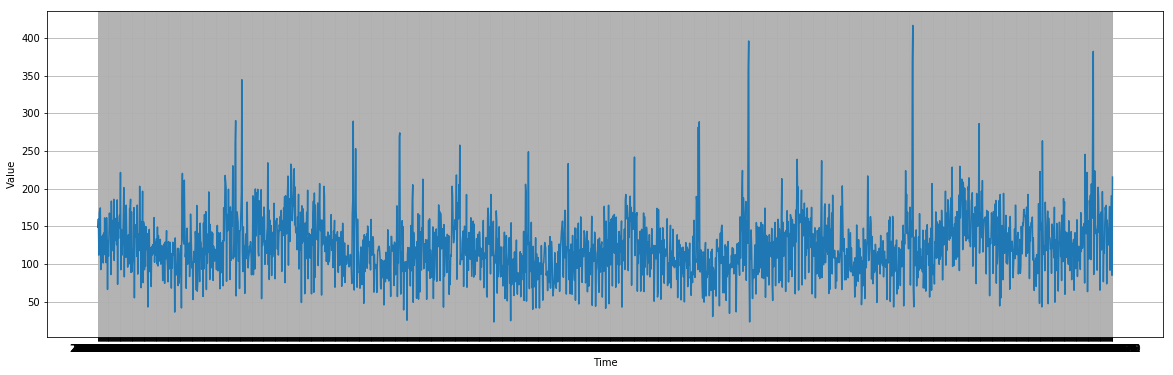

In [53]:
plt.figure(figsize=(20, 6))
plot_series(Group_1['Datum'], Group_1['Umsatz'])
plt.show()

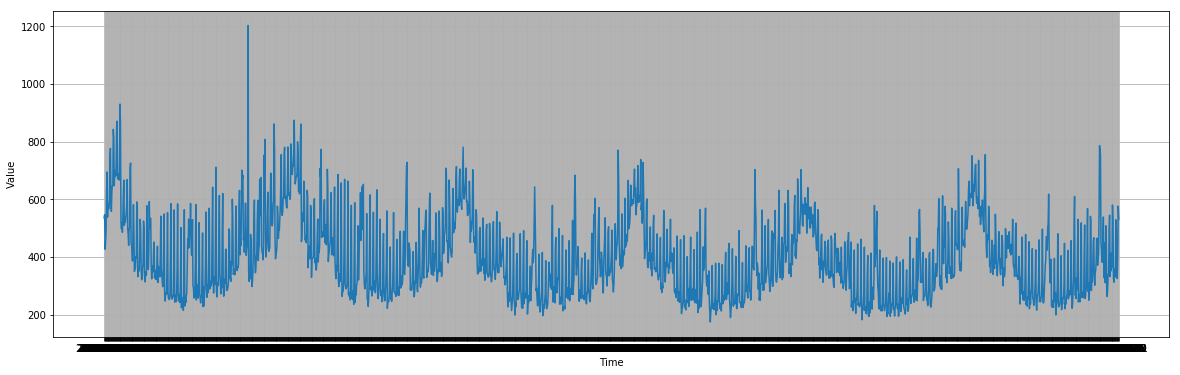

In [54]:
plt.figure(figsize=(20, 6))
plot_series(Group_2['Datum'], Group_2['Umsatz'])
plt.show()

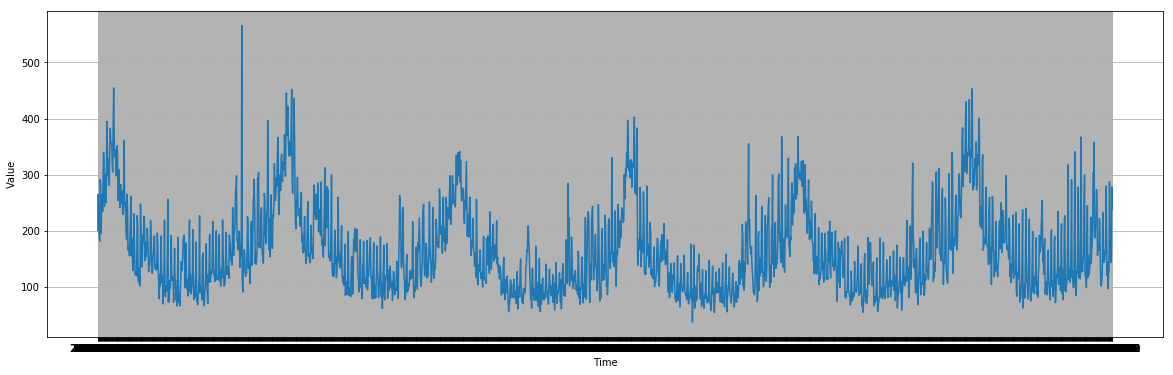

In [12]:
plt.figure(figsize=(20, 6))
plot_series(Group_3['Datum'], Group_3['Umsatz'])
plt.show()

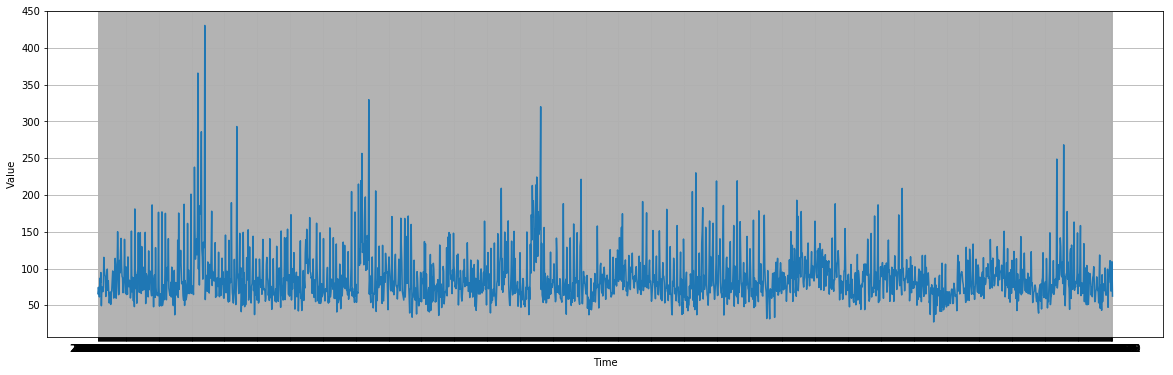

In [13]:
plt.figure(figsize=(20, 6))
plot_series(Group_4['Datum'], Group_4['Umsatz'])
plt.show()